# GPN MSA dataset 2

Analyzing the dataset and plotting some things about it

In [1]:
import zarr
msa_path = '/data1/lesliec/sarthak/data/gpn/99.zarr'
zarr_dataset = zarr.open(msa_path, mode="r")
zarr_dataset['20'].shape

(64444167, 100)

In [2]:
#64 million, what if we chunk it into bins of 128
64_000_000 / 128

500000.0

In [3]:
#can we plot 500000 points?
#what if we do it into 1kb, then we have
64_000_000 / 1024 #this is definitely plottable

62500.0

In [5]:
zarr_dataset['20'].nbytes/1e9

6.4444167

In [6]:
#let's load it into memory
chr20 = zarr_dataset['20'][:]
chr20.shape

(64444167, 100)

In [7]:
#now grab a test sequence
test1 = chr20[:1024,0]
test2 = chr20[:1024,1]
print(test1,test2)

[b'N' b'N' b'N' ... b'N' b'N' b'N'] [b'-' b'-' b'-' ... b'-' b'-' b'-']


In [8]:
test1==test2

array([False, False, False, ..., False, False, False])

In [13]:
#so let's chunk the data into 1024 chunks
similar = []
for i in range(0,64_000_000,1024):
    test1 = chr20[i:i+1024,0]
    test2 = chr20[i:i+1024,1]
    similar.append((test1==test2).sum())
print(len(similar))

62500


In [14]:
similar

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 289,
 683,
 805,
 105,
 0,
 0,
 42,
 171,
 155,
 0,
 0,
 0,
 0,
 0,
 0,
 396,
 496,
 440,
 0,
 192,
 992,
 803,
 468,
 198,
 476,
 30,
 439,
 270,
 478,
 895,
 50,
 0,
 512,
 98,
 365,
 253,
 0,
 0,
 0,
 0,
 0,
 0,
 320,
 1007,
 277,
 0,
 0,
 69,
 189,
 0,
 64,
 22,
 262,
 868,
 819,
 241,
 0,
 0,
 0,
 91,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 58,
 0,
 0,
 169,
 387,
 980,
 638,
 706,
 739,
 636,
 679,
 489,
 276,
 1,
 0,
 0,
 71,
 743,
 596,
 598,
 786,
 823,
 319,
 0,
 0,
 0,
 40,
 466,
 478,
 6,
 35,
 52,
 657,
 160,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 33,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 252,
 0,
 790,
 358,
 681,
 271,
 157,
 134,
 2,
 722,
 551,
 691,
 159,
 

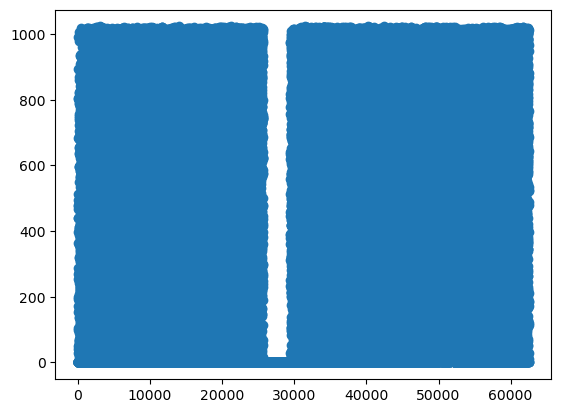

In [15]:
#that was done literally instantly? I guess it's all in memory, so it's incredibly fast
import matplotlib.pyplot as plt
plt.scatter(range(len(similar)),similar)

In [16]:
#ok that' simpossible to tell, let's chunk it into 10kb chunks
chunk_size = 10_000
similar = []
for i in range(0,64_000_000,chunk_size):
    test1 = chr20[i:i+chunk_size,0]
    test2 = chr20[i:i+chunk_size,1]
    similar.append((test1==test2).sum())
print(len(similar))

6400


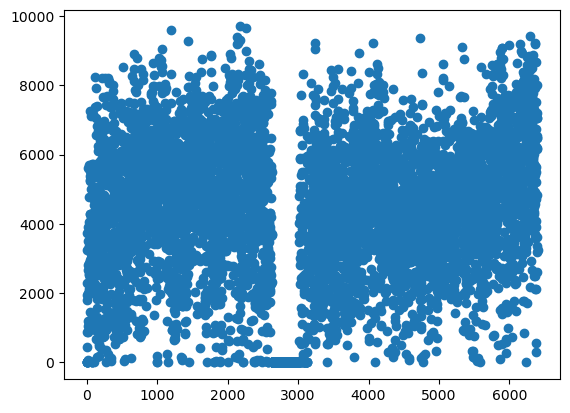

In [17]:
plt.scatter(range(len(similar)),similar)

6400


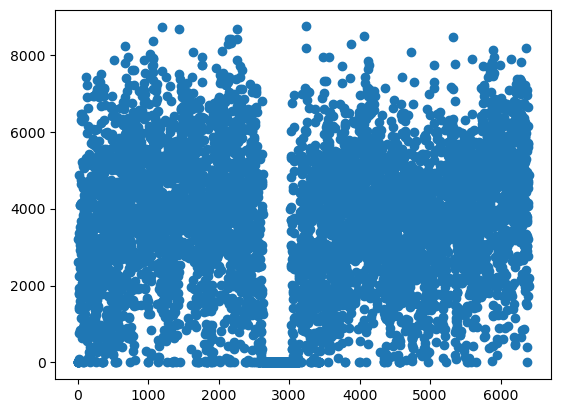

In [18]:
#ok so that middle region is likely the middle of the chromosome that is unmappable, let's see for a less related species
chunk_size = 10_000
similar = []
for i in range(0,64_000_000,chunk_size):
    test1 = chr20[i:i+chunk_size,0]
    test2 = chr20[i:i+chunk_size,10]
    similar.append((test1==test2).sum())
print(len(similar))
plt.scatter(range(len(similar)),similar)

6400


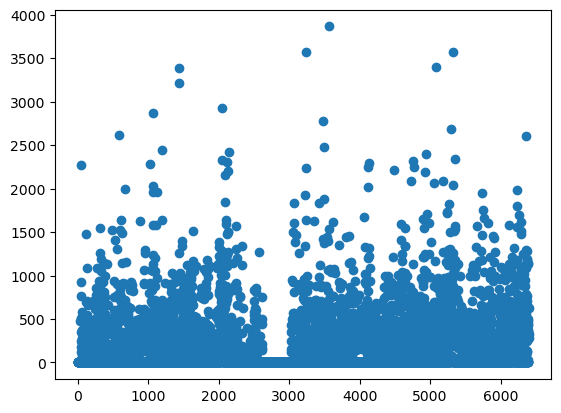

In [19]:
#quite similar, let's go much less related
chunk_size = 10_000
similar = []
for i in range(0,64_000_000,chunk_size):
    test1 = chr20[i:i+chunk_size,0]
    test2 = chr20[i:i+chunk_size,80]
    similar.append((test1==test2).sum())
print(len(similar))
plt.scatter(range(len(similar)),similar)

In [22]:
#let's get the list of names of species
from Bio import Phylo

In [25]:
filepath = '/data1/lesliec/sarthak/data/gpn/hg38.100way.commonNames.nh'
tree = Phylo.read(filepath, "newick")

# Display as a simple plot
Phylo.draw(tree)
plt.show()

NewickError: Mismatch, 59 open vs 55 close parentheses.

In [30]:
#let's try reformatting it
import re

# Read the Newick file
mainpath = '/data1/lesliec/sarthak/data/gpn/'

with open(mainpath+"hg38.100way.commonNames.nh", "r") as f:
    tree_data = f.read().strip()

# Remove excessive spaces and newlines
cleaned_tree = re.sub(r"\s+", " ", tree_data)

# Save the cleaned tree
with open(mainpath+"cleaned_tree.nh", "w") as f:
    f.write(cleaned_tree)

print("Cleaned tree saved as cleaned_tree.nh")

Cleaned tree saved as cleaned_tree.nh


In [33]:
#no need to actually parse the tree, let's just get the names, just copy pasted

import re

# Input and output file names
input_file = mainpath+"species.txt"  # Your copied text file
output_file = mainpath+"species.tsv"  # TSV output

# Open the file and process it
with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    # Write header row
    outfile.write("Taxonomic_Group\tCommon_Name\tScientific_Name\tDate\tAssembly_Version\tAlignment_Method\n")

    taxonomic_group = None  # Placeholder for the group name

    for line in infile:
        line = line.strip()

        # Check for section headers (e.g., "== Primate subset ==")
        match = re.match(r"== (.+?) subset ==", line)
        if match:
            taxonomic_group = match.group(1)  # Extract the group name
            continue  # Skip to the next line

        # Skip empty lines
        if not line:
            continue

        # Extract data columns (assuming consistent spacing)
        parts = re.split(r"\s{2,}", line)  # Split on multiple spaces
        if len(parts) == 5:
            common_name, scientific_name, date, assembly_version, alignment_method = parts
            outfile.write(f"{taxonomic_group}\t{common_name}\t{scientific_name}\t{date}\t{assembly_version}\t{alignment_method}\n")

print(f"TSV file saved as {output_file}")


TSV file saved as /data1/lesliec/sarthak/data/gpn/species.tsv


In [39]:
#that didn't quite work, let's edit it
import csv

INPUT_FILENAME = mainpath+"species.txt"  # Your copied text file
OUTPUT_FILENAME = mainpath+"species.tsv"  # TSV output

HEADING_REGEX = re.compile(r'^==\s*(.*?)\s+subset\s*==\s*$')

# Split on 2+ spaces. This keeps "Homo sapiens" in one piece,
# but breaks columns that are separated by big gaps.
SPLIT_REGEX = re.compile(r'\s{2,}')

current_group = None  # Will hold things like "Primate", "Fish", etc.

rows = []

with open(INPUT_FILENAME, 'r', encoding='utf-8') as infile:
    for line in infile:
        line = line.rstrip()  # strip trailing whitespace
        if not line:
            # Skip totally blank lines
            continue

        # Check if it's a heading line: == Primate subset ==
        match = HEADING_REGEX.match(line)
        if match:
            # Capture just the part before 'subset' (e.g. "Primate")
            current_group = match.group(1)
            continue

        # Otherwise, parse as a species line
        parts = SPLIT_REGEX.split(line)
        if len(parts) < 4:
            # We expect at least 4 pieces to make sense of the line:
            # 1: common name
            # 2: scientific name
            # 3: date
            # 4: assembly version
            # 5+: alignment method...
            continue

        # Extract the first four fields
        common_name = parts[0]
        sci_name    = parts[1]
        date_str    = parts[2]
        assembly_ver = parts[3]

        # The rest (if any) become alignment_method
        if len(parts) > 4:
            alignment_method = " ".join(parts[4:])
        else:
            alignment_method = ""

        # Build our row
        row_dict = {
            'Taxonomic_Group': current_group,    # e.g. "Primate"
            'Common_Name':     common_name,
            'Scientific_Name': sci_name,
            'Date':            date_str,
            'Assembly_Version': assembly_ver,
            'Alignment_Method': alignment_method,
            # If you want a separate column 'group' to also say "Primate",
            # you can duplicate the same string here:
            # 'group':           current_group
        }
        rows.append(row_dict)

# Write out as TSV
with open(OUTPUT_FILENAME, 'w', newline='', encoding='utf-8') as outfile:
    writer = csv.DictWriter(
        outfile,
        fieldnames=[
            'Taxonomic_Group',
            'Common_Name',
            'Scientific_Name',
            'Date',
            'Assembly_Version',
            'Alignment_Method',
            # 'group'
        ],
        delimiter='\t'
    )
    writer.writeheader()
    writer.writerows(rows)

In [43]:
# Regex to detect lines like "== Primate subset =="
# We capture only the text before the word "subset" (e.g. "Primate").
HEADING_REGEX = re.compile(r'^==\s*(.*?)\s+subset\s*==\s*$')

# We'll split on EITHER 2+ spaces OR tabs.
SPLIT_REGEX = re.compile(r'\s{2,}|\t+')

current_taxonomic_group = None
rows = []

with open(INPUT_FILENAME, 'r', encoding='utf-8') as infile:
    for raw_line in infile:
        line = raw_line.strip()
        
        # Skip blank lines
        if not line:
            continue
        
        # Check if this is a heading line, e.g. "== Primate subset =="
        heading_match = HEADING_REGEX.match(line)
        if heading_match:
            # Store "Primate" (ignoring 'subset')
            current_taxonomic_group = heading_match.group(1)
            continue
        
        # Otherwise, parse the line as a species row.
        # Split on 2+ spaces or tabs:
        parts = SPLIT_REGEX.split(line)
        # Remove any fully empty chunks just in case:
        parts = [p for p in parts if p]

        # We expect at least 4 columns:
        #   1) Common_Name
        #   2) Scientific_Name
        #   3) Date (e.g. "May 2013")
        #   4) Assembly_Version
        #   5+) Alignment_Method (joined)
        if len(parts) < 4:
            # If not enough columns, skip or handle differently:
            continue
        
        common_name = parts[0]
        scientific_name = parts[1]
        date_str = parts[2]
        assembly_ver = parts[3]
        
        # If there's more text beyond the 4th column,
        # join it all together into alignment_method.
        if len(parts) > 4:
            alignment_method = " ".join(parts[4:])
        else:
            alignment_method = ""
        
        row = {
            'Taxonomic_Group':  current_taxonomic_group,
            'Common_Name':      common_name,
            'Scientific_Name':  scientific_name,
            'Date':             date_str,
            'Assembly_Version': assembly_ver,
            'Alignment_Method': alignment_method
        }
        rows.append(row)

# Write out the final TSV. Note: No "group" column here.
fieldnames = [
    'Taxonomic_Group',
    'Common_Name',
    'Scientific_Name',
    'Date',
    'Assembly_Version',
    'Alignment_Method'
]

with open(OUTPUT_FILENAME, 'w', newline='', encoding='utf-8') as outfile:
    writer = csv.DictWriter(outfile, fieldnames=fieldnames, delimiter='\t')
    writer.writeheader()
    writer.writerows(rows)

In [46]:
#ok that doesn't work still, let's just do it manually
        
current_group = None
with open(INPUT_FILENAME, 'r', encoding='utf-8') as infile:
    for raw_line in infile:
        line = raw_line.strip()
        # print(line)
        if line.startswith('=='):
            current_group = line.split()[1]
            continue
        if not line:
            continue
        print(line)

Human                    Homo sapiens                   Dec 2013  GRCh38/hg38                                   Reference species
Chimp                    Pan troglodytes                Feb 2011  CSAC 2.1.4/panTro4                            Syntenic net
Gorilla                  Gorilla gorilla gorilla        May 2011  gorGor3.1/gorGor3                             Reciprocal best net
Orangutan                Pongo pygmaeus abelii          July 2007 WUGSC 2.0.2/ponAbe2                           Reciprocal best net
Gibbon                   Nomascus leucogenys            Oct 2012  GGSC Nleu3.0/nomLeu3                          Syntenic net
Rhesus                   Macaca mulatta                 Oct 2010  BGI CR_1.0/rheMac3                            Syntenic net
Crab-eating macaque      Macaca fascicularis            Jun 2013  Macaca_fascicularis_5.0/macFas5               Syntenic net
Baboon                   Papio hamadryas                Mar 2012  Baylor Panu_2.0/papAnu2                 

In [52]:
splits = line.split(' ')
# for groups
splits

['Lamprey',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Petromyzon',
 'marinus',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Sep',
 '2010',
 '',
 'WUGSC',
 '7.0/petMar2',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Net']

In [61]:
#now we can make groups by manually going through
full_groups = []
# g = 0
tempgroup = []
for s in splits:
    if not s:
        # g += 1
        if len(tempgroup) > 0:
            full = " ".join(tempgroup)
            full_groups.append(full)
            tempgroup = []
        continue
    tempgroup.append(s)
if len(tempgroup) > 0:
    full = " ".join(tempgroup)
    full_groups.append(full)
    tempgroup = []
full_groups

['Lamprey', 'Petromyzon marinus', 'Sep 2010', 'WUGSC 7.0/petMar2', 'Net']

In [63]:
#now just combine this together, very simple!!

current_group = None
with open(INPUT_FILENAME, 'r', encoding='utf-8') as infile:
    for raw_line in infile:
        line = raw_line.strip()
        # print(line)
        if line.startswith('=='):
            current_group = line.split()[1]
            continue
        if not line:
            continue
        # print(line)
        splits = line.split(' ')
        full_groups = []
        # g = 0
        tempgroup = []
        for s in splits:
            if not s:
                # g += 1
                if len(tempgroup) > 0:
                    full = " ".join(tempgroup)
                    full_groups.append(full)
                    tempgroup = []
                continue
            tempgroup.append(s)
        if len(tempgroup) > 0:
            full = " ".join(tempgroup)
            full_groups.append(full)
            tempgroup = []
        # full_groups
        #insert the name of the group
        full_groups.insert(0, current_group)
        print(full_groups)

['Primate', 'Human', 'Homo sapiens', 'Dec 2013', 'GRCh38/hg38', 'Reference species']
['Primate', 'Chimp', 'Pan troglodytes', 'Feb 2011', 'CSAC 2.1.4/panTro4', 'Syntenic net']
['Primate', 'Gorilla', 'Gorilla gorilla gorilla', 'May 2011', 'gorGor3.1/gorGor3', 'Reciprocal best net']
['Primate', 'Orangutan', 'Pongo pygmaeus abelii', 'July 2007 WUGSC 2.0.2/ponAbe2', 'Reciprocal best net']
['Primate', 'Gibbon', 'Nomascus leucogenys', 'Oct 2012', 'GGSC Nleu3.0/nomLeu3', 'Syntenic net']
['Primate', 'Rhesus', 'Macaca mulatta', 'Oct 2010', 'BGI CR_1.0/rheMac3', 'Syntenic net']
['Primate', 'Crab-eating macaque', 'Macaca fascicularis', 'Jun 2013', 'Macaca_fascicularis_5.0/macFas5', 'Syntenic net']
['Primate', 'Baboon', 'Papio hamadryas', 'Mar 2012', 'Baylor Panu_2.0/papAnu2', 'Reciprocal best net']
['Primate', 'Green monkey', 'Chlorocebus sabaeus', 'Mar 2014', 'Chlorocebus_sabeus 1.1/chlSab2', 'Syntenic net']
['Primate', 'Marmoset', 'Callithrix jacchus', 'Mar 2009', 'WUGSC 3.2/calJac3', 'Syntenic 

In [73]:
#now we can finalize this

#acually had to modify some of the lines and add sapces, as sometimes there are no spaces?

#now just combine this together, very simple!!
rows = []
current_group = None
with open(INPUT_FILENAME, 'r', encoding='utf-8') as infile:
    for raw_line in infile:
        line = raw_line.strip()
        # print(line)
        if line.startswith('=='):
            current_group = line.split()[1]
            continue
        if not line:
            continue
        # print(line)
        splits = line.split(' ')
        full_groups = []
        # g = 0
        tempgroup = []
        for s in splits:
            if not s:
                # g += 1
                if len(tempgroup) > 0:
                    full = " ".join(tempgroup)
                    full_groups.append(full)
                    tempgroup = []
                continue
            tempgroup.append(s)
        if len(tempgroup) > 0:
            full = " ".join(tempgroup)
            full_groups.append(full)
            tempgroup = []
        # full_groups
        #insert the name of the group
        full_groups.insert(0, current_group)
        # print(full_groups)
        rows.append("\t".join(full_groups))
# rows
#and write it out
with open(OUTPUT_FILENAME, 'w', encoding='utf-8') as outfile:
    outfile.write("Taxonomic_Group\tCommon_Name\tScientific_Name\tDate\tAssembly_Version\tAlignment_Method\n")
    for r in rows:
        outfile.write(r+"\n")

In [69]:
#why doesn't it work with chinese softshell turtle
rows = []
current_group = None
with open(INPUT_FILENAME, 'r', encoding='utf-8') as infile:
    for raw_line in infile:
        line = raw_line.strip()
        # print(line)
        if line.startswith('=='):
            current_group = line.split()[1]
            continue
        if not line:
            continue
        # print(line)
        if line.startswith('Chinese softshell turtle'):
            break
        splits = line.split(' ')
        full_groups = []
        # g = 0
        tempgroup = []
        for s in splits:
            if not s:
                # g += 1
                if len(tempgroup) > 0:
                    full = " ".join(tempgroup)
                    full_groups.append(full)
                    tempgroup = []
                continue
            tempgroup.append(s)
        if len(tempgroup) > 0:
            full = " ".join(tempgroup)
            full_groups.append(full)
            tempgroup = []
        # full_groups
        #insert the name of the group
        full_groups.insert(0, current_group)
        # print(full_groups)
        rows.append("\t".join(full_groups))

In [70]:
line #ahh it only has one space in between, impossible to easily separate! No wonder chatgpt struggled!
#simply added a space.

'Chinese softshell turtle Pelodiscus sinensis            Oct 2011  PelSin_1.0/pelSin1                            Net'

In [83]:
#now we can easily load in the species names
import pandas as pd
species_names = pd.read_csv(OUTPUT_FILENAME, sep='\t')
species_names

,Taxonomic_Group,Common_Name,Scientific_Name,Date,Assembly_Version,Alignment_Method
0,Primate,Human,Homo sapiens,Dec 2013,GRCh38/hg38,Reference species
1,Primate,Chimp,Pan troglodytes,Feb 2011,CSAC 2.1.4/panTro4,Syntenic net
2,Primate,Gorilla,Gorilla gorilla gorilla,May 2011,gorGor3.1/gorGor3,Reciprocal best net
3,Primate,Orangutan,Pongo pygmaeus abelii,July 2007,WUGSC 2.0.2/ponAbe2,Reciprocal best net
4,Primate,Gibbon,Nomascus leucogenys,Oct 2012,GGSC Nleu3.0/nomLeu3,Syntenic net
...,...,...,...,...,...,...
95,Fish,Atlantic cod,Gadus morhua,May 2010,Genofisk GadMor_May2010/gadMor1,Net
96,Fish,Zebrafish,Danio rerio,Sep 2014,Zv10/danRer10,Net
97,Fish,Mexican tetra (cavefish),Astyanax mexicanus,Apr 2013,Astyanax_mexicanus-1.0.2/astMex1,Net
98,Fish,Spotted gar,Lepisosteus oculatus,Dec 2011,LepOcu1/lepOcu1,Net


In [84]:
species_names = species_names['Common_Name'].tolist()
species_names

['Human',
 'Chimp',
 'Gorilla',
 'Orangutan',
 'Gibbon',
 'Rhesus',
 'Crab-eating macaque',
 'Baboon',
 'Green monkey',
 'Marmoset',
 'Squirrel monkey',
 'Bushbaby',
 'Chinese tree shrew',
 'Squirrel',
 'Lesser Egyptian jerboa',
 'Prairie vole',
 'Chinese hamster',
 'Golden hamster',
 'Mouse',
 'Rat',
 'Naked mole-rat',
 'Guinea pig',
 'Chinchilla',
 'Brush-tailed rat',
 'Rabbit',
 'Pika',
 'Pig',
 'Alpaca',
 'Bactrian camel',
 'Dolphin',
 'Killer whale',
 'Tibetan antelope',
 'Cow',
 'Sheep',
 'Domestic goat',
 'Horse',
 'White rhinoceros',
 'Cat',
 'Dog',
 'Ferret',
 'Panda',
 'Pacific walrus',
 'Weddell seal',
 'Black flying-fox',
 'Megabat',
 "David's myotis bat",
 'Microbat',
 'Big brown bat',
 'Hedgehog',
 'Shrew',
 'Star-nosed mole',
 'Elephant',
 'Cape elephant shrew',
 'Manatee',
 'Cape golden mole',
 'Tenrec',
 'Aardvark',
 'Armadillo',
 'Opossum',
 'Tasmanian devil',
 'Wallaby',
 'Platypus',
 'Saker falcon',
 'Peregrine falcon',
 'Collared flycatcher',
 'White-throated sparr

In [85]:
len(species_names)

100

6400
6400
6400
6400
6400
6400


Text(0.5, 0.98, 'Number of matches in 10kb chunks across species (chr20)')

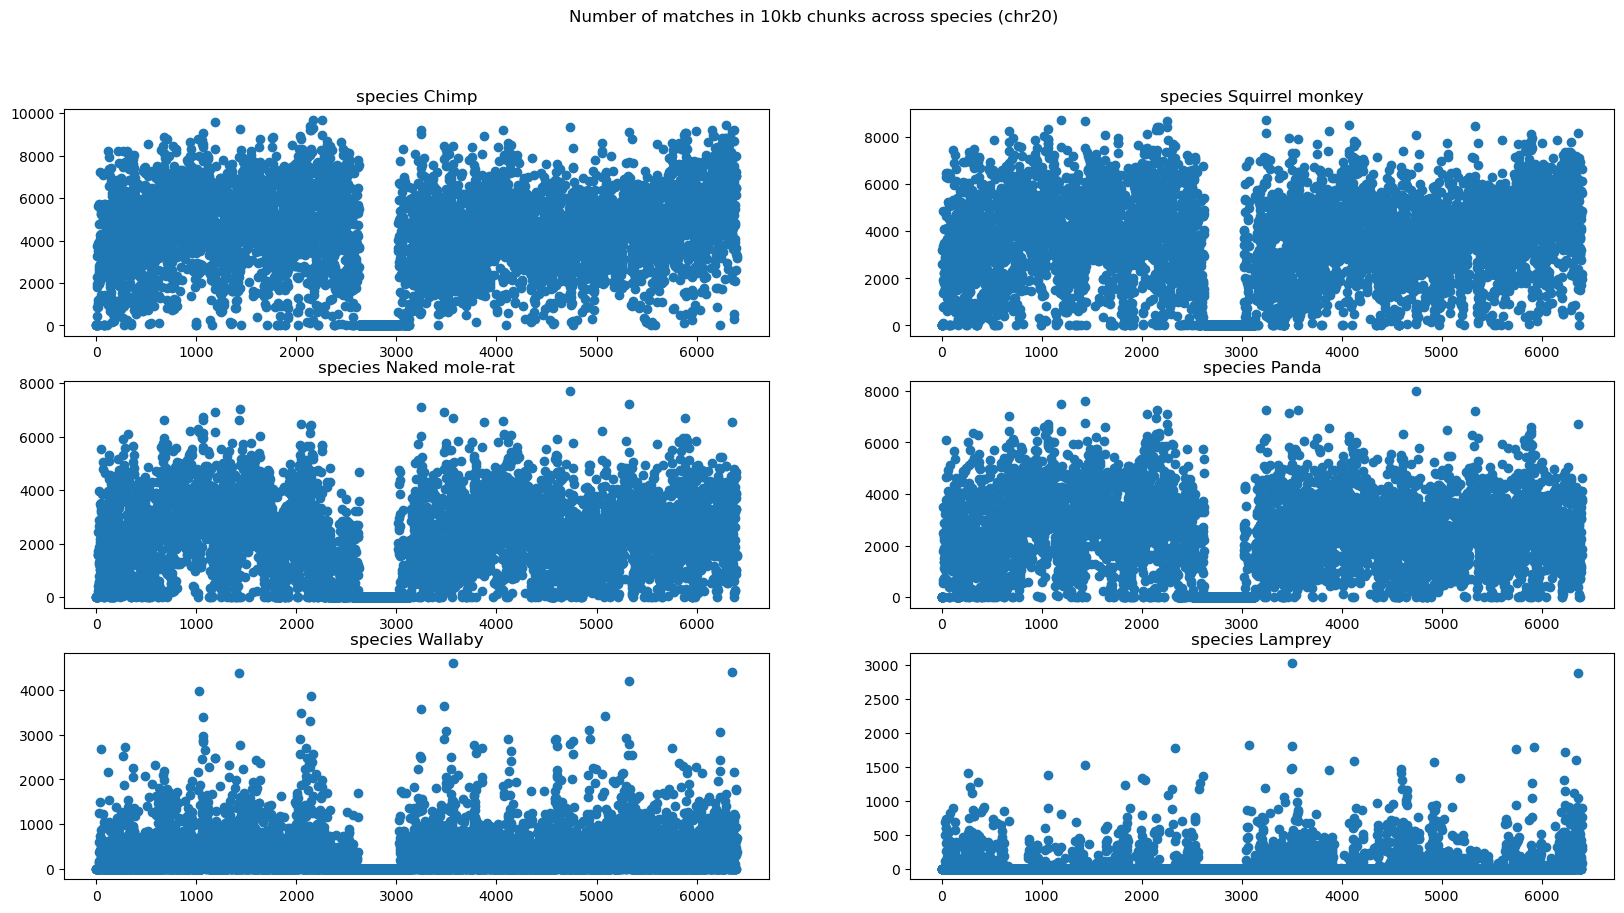

In [86]:
#let's make a subplot that's like 3 rows 2 columns where it's this plot but for different species
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
chunk_size = 10_000
for sp,ax in zip(species,axs.flatten()):
    similar = []
    for i in range(0,64_000_000,chunk_size):
        test1 = chr20[i:i+chunk_size,0]
        test2 = chr20[i:i+chunk_size,sp]
        similar.append((test1==test2).sum())
    print(len(similar))
    ax.scatter(range(len(similar)),similar)
    ax.set_title(f'species {species_names[sp]}')
#set main title
plt.suptitle('Number of matches in 10kb chunks across species (chr20)')